In [1]:
%matplotlib notebook
import numpy as np
import theano.tensor as tt
import pymc3 as pm

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('notebook')
plt.style.use('seaborn-darkgrid')
print('Running on PyMC3 v{}'.format(pm.__version__))
core_count = 12

Running on PyMC3 v3.8


In [2]:
def SuperNova_Curve(t, A, B, t0, trise):
    return ((A+B*(t-t0))/(1+np.exp(-(t-t0)/trise)))

In [3]:
#These are the values we are going to use for a test
np.random.seed(212)
trise_A = .3
Amplitude_A = 10.5
Beta_A = -.4
t0_A = 6.7
t1_A = float(15)
size = 50 #data set size
sigma = .1 #Telescope error

In [4]:
time_axis = np.random.uniform(low=0, high=t1_A, size=size)
Y_actual = SuperNova_Curve(time_axis, Amplitude_A, Beta_A, t0_A, trise_A)
Y_observed = Y_actual + np.random.normal(0,sigma,size)

<IPython.core.display.Javascript object>


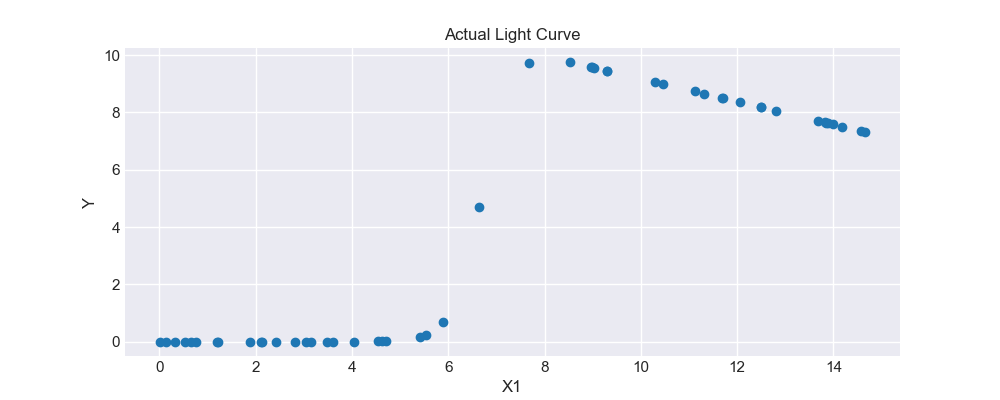

Text(0.5, 1.0, 'Actual Light Curve')

In [5]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(10,4))
axes.scatter(time_axis, Y_actual)
axes.set_ylabel('Y')
axes.set_xlabel('X1')
plt.title("Actual Light Curve")

<IPython.core.display.Javascript object>


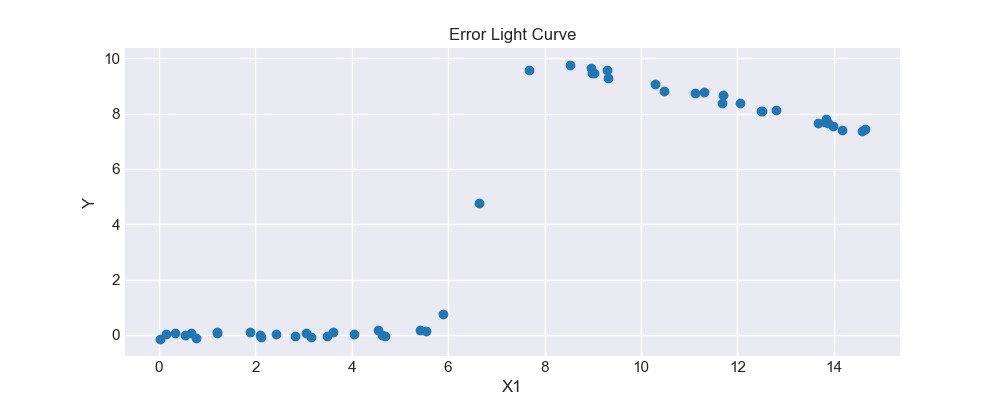

Text(0.5, 1.0, 'Error Light Curve')

In [6]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(10,4))
axes.errorbar(time_axis, Y_observed, sigma, fmt="o")
axes.set_ylabel('Y')
axes.set_xlabel('X1')
plt.title("Error Light Curve")

In [7]:
basic_model = pm.Model()

In [8]:
with basic_model:

    # Priors for unknown model parameters
    AboveZeroBound = pm.Bound(pm.Normal, lower = 0.0)
    BelowZeroBound = pm.Bound(pm.Normal, upper = 0.0)
    trise = AboveZeroBound('trise', mu=0, sigma=10)
    Amplitude = AboveZeroBound('Amplitude', mu=0, sigma=10)
    Beta = BelowZeroBound('Beta', mu=0, sigma=10)
    t0 = AboveZeroBound('t0', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=.2)
    # Expected value of outcome
    mu = SuperNova_Curve(time_axis, Amplitude, Beta, t0, trise)

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=Y_observed)

In [9]:
map_estimate = pm.find_MAP(model=basic_model)

map_estimate

logp = -4.7642, ||grad|| = 9.9291e+07: 100%|███████████████████████████████████████| 108/108 [00:00<00:00, 2866.87it/s]


{'trise_lowerbound__': array(140.61038143),
 'Amplitude_lowerbound__': array(19241.19609992),
 'Beta_upperbound__': array(-5052.85105179),
 't0_lowerbound__': array(-2.10212645e+09),
 'sigma_log__': array(560.90599709),
 'trise': array(1.16496466e+61),
 'Amplitude': array(inf),
 'Beta': array(-0.),
 't0': array(0.),
 'sigma': array(3.96624377e+243)}

In [10]:
with basic_model:
    # 1000 posterior samples
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, t0, Beta, Amplitude, trise]
Sampling 4 chains, 0 divergences: 100%|█████████████████████████████████████| 42000/42000 [00:25<00:00, 1678.52draws/s]
The acceptance probability does not match the target. It is 0.8871507011540309, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9085024051491859, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9160424690594038, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8939695913439586, but should be close to 0.8. Try to increase the number of tuning steps.


C:\ProgramData\Anaconda3\envs\Astronomy\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\ProgramData\Anaconda3\envs\Astronomy\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\ProgramData\Anaconda3\envs\Astronomy\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\ProgramData\Anaconda3\envs\Astronomy\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000211783647C8>,
      dtype=object)

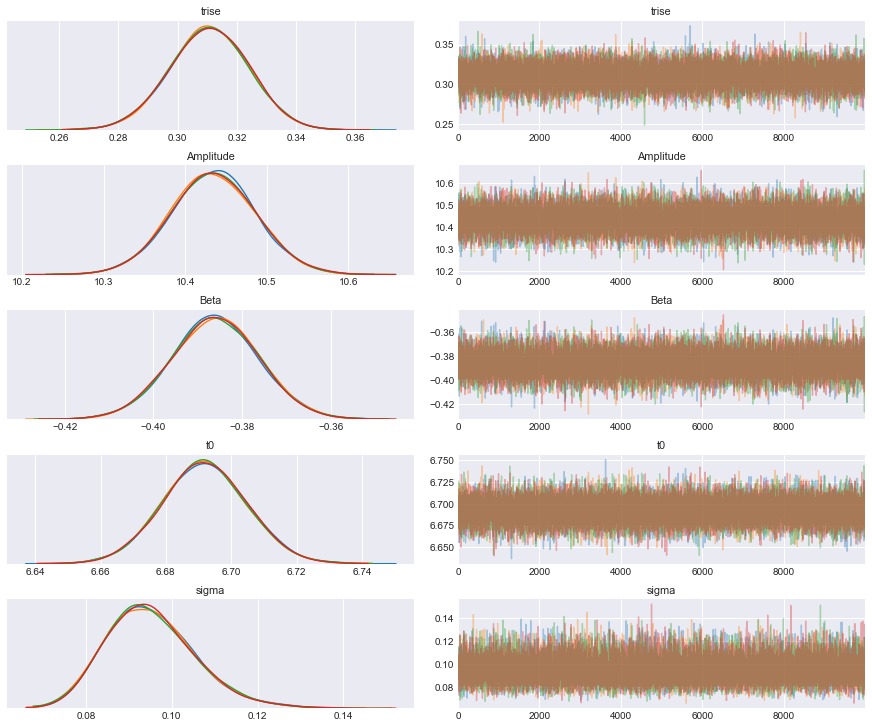

In [11]:
%matplotlib inline
pm.traceplot(trace)

In [12]:
trise_R = pm.summary(trace)["mean"]["trise"]
Amplitude_R = pm.summary(trace)["mean"]["Amplitude"]
Beta_R = pm.summary(trace)["mean"]["Beta"]
t0_R = pm.summary(trace)["mean"]["t0"]

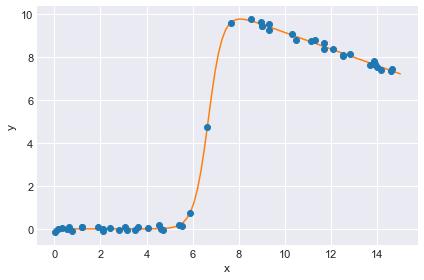

In [19]:
fig, ax = plt.subplots()

ax.errorbar(time_axis, Y_observed, .1, fmt='o')
big_time_axis = np.linspace(0,t1_A,num = 100)
ax.plot(big_time_axis, SuperNova_Curve(big_time_axis, Amplitude_R, Beta_R, t0_R, trise_R))
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.tight_layout()